In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [10]:
data0 = pd.read_csv("E://Marketing, Advertising & Data Science//Python & R projects//bank loan.csv")
data0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


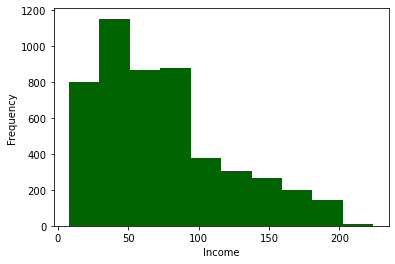

In [12]:
data0.Income.plot.hist(color='darkgreen')
plt.xlabel('Income')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
cols_to_scale = ['Income', 'CCAvg']
data_scaled = data0.copy()

In [15]:
data_scaled[cols_to_scale] = scaler.fit_transform(data0[cols_to_scale])

In [16]:
data_scaled[cols_to_scale].describe()

,Income,CCAvg
count,5.000000e+03,5.000000e+03
mean,1.939449e-16,-2.078338e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


In [18]:
data_scaled.rename({'Income':'Income_scaled','CCAvg':'CCAvg_scaled'}, axis=1, inplace=True)
data_scaled.head()

,ID,Age,Experience,Income_scaled,ZIP Code,Family,CCAvg_scaled,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,-0.538229,91107,4,-0.193385,1,0,0,1,0,0,0
1,2,45,19,-0.864109,90089,3,-0.250611,1,0,0,1,0,0,0
2,3,39,15,-1.363793,94720,1,-0.536736,1,0,0,0,0,0,0
3,4,35,9,0.569765,94112,1,0.436091,2,0,0,0,0,0,0
4,5,35,8,-0.625130,91330,4,-0.536736,2,0,0,0,0,0,1


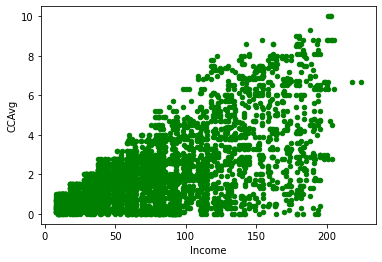

In [21]:
data0.plot.scatter(x='Income', y='CCAvg', color='green')
plt.show()

In [23]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42)
cluster_cols = ['Income_scaled', 'CCAvg_scaled']
data_scaled[cluster_cols].head(5)

,Income_scaled,CCAvg_scaled
0,-0.538229,-0.193385
1,-0.864109,-0.250611
2,-1.363793,-0.536736
3,0.569765,0.436091
4,-0.625130,-0.536736


In [36]:
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])
data_scaled.head(13)

,ID,Age,Experience,Income_scaled,ZIP Code,Family,CCAvg_scaled,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Cluster
0,1,25,1,-0.538229,91107,4,-0.193385,1,0,0,1,0,0,0,1
1,2,45,19,-0.864109,90089,3,-0.250611,1,0,0,1,0,0,0,1
2,3,39,15,-1.363793,94720,1,-0.536736,1,0,0,0,0,0,0,1
3,4,35,9,0.569765,94112,1,0.436091,2,0,0,0,0,0,0,2
4,5,35,8,-0.625130,91330,4,-0.536736,2,0,0,0,0,0,1,1
5,6,37,13,-0.972736,92121,4,-0.880087,2,155,0,0,0,1,0,1
6,7,53,27,-0.038545,91711,2,-0.250611,2,0,0,0,0,1,0,2
7,8,50,24,-1.124814,93943,1,-0.937312,3,0,0,0,0,0,1,1
8,9,35,10,0.156983,90089,3,-0.765637,2,104,0,0,0,1,0,2
9,10,34,9,2.307795,93023,1,3.984049,3,0,1,0,0,0,0,0


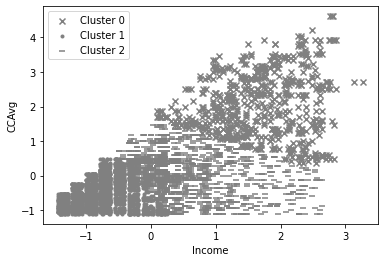

In [32]:
markers = ['x', '.', '_']
for clust in range(3):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.Income_scaled, temp.CCAvg_scaled, marker=markers[clust], color = 'gray', label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()
plt.show()

In [35]:
data_scaled.Cluster.head()

0    1
1    1
2    1
3    2
4    1
Name: Cluster, dtype: int32

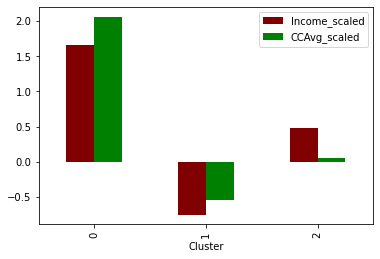

In [45]:
data0['Cluster'] = data_scaled.Cluster
data_scaled.groupby('Cluster')[['Income_scaled', 'CCAvg_scaled']].mean().plot.bar(color=['maroon','green'])
plt.show()

In [ ]:
data0 = data_scaled

In [46]:
data0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Cluster
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,2
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1


In [47]:
data0.groupby('Cluster')[['Income', 'CCAvg']].mean()

,Income,CCAvg
Cluster,,
0,150.390282,5.540345
1,39.135072,0.982417
2,96.142777,2.025165


In [49]:
sel_cols = ['Income', 'CCAvg', 'Age', 'Mortgage', 'Family', \
'CreditCard', 'Online', 'Personal Loan']
data0.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,
0,150.390282,5.540345,43.924765,89.537618,2.017241,0.285266,0.605016,0.413793
1,39.135072,0.982417,45.797197,42.231218,2.513429,0.294667,0.592448,0.000000
2,96.142777,2.025165,45.184049,65.185165,2.363636,0.296152,0.600112,0.120468
